# Unsupervised Learning

## 클러스터링

### K-means

In [5]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 샘플
points, labels = make_blobs(n_samples=100, n_features=2, centers=5, random_state=135)

print(points.shape, points[:10])
print(labels.shape, labels[:10])


(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


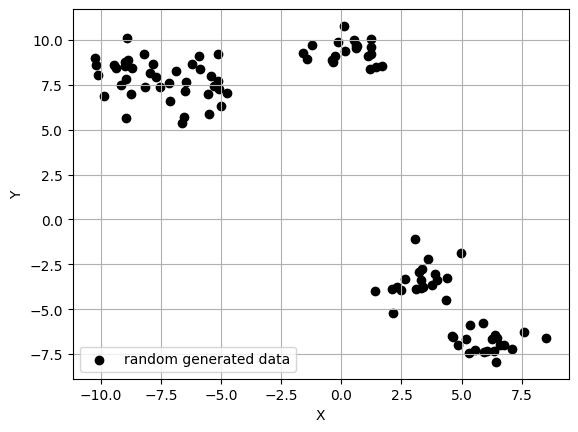

In [6]:
# 샘플 시각화

# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

생성한 데이터에 K-means 알고리즘 적용

In [12]:
from sklearn.cluster import KMeans

kmeans_cluster = KMeans(n_clusters=5)

kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))


<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


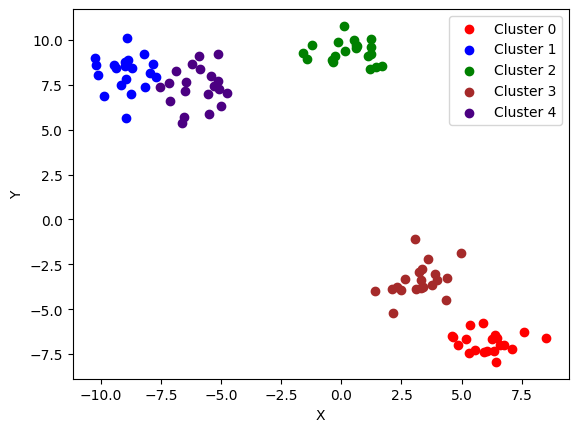

In [13]:
# 시각화

color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo'} 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for cluster in range(5):
    sub_cluster_points = points[kmeans_cluster.labels_ == cluster]
    ax.scatter(x=sub_cluster_points[:, 0], y=sub_cluster_points[:, 1], color=color_dict[cluster], label=f"Cluster {cluster}")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.show()

### K-means 알고리즘이 잘 동작하지 않는 예시

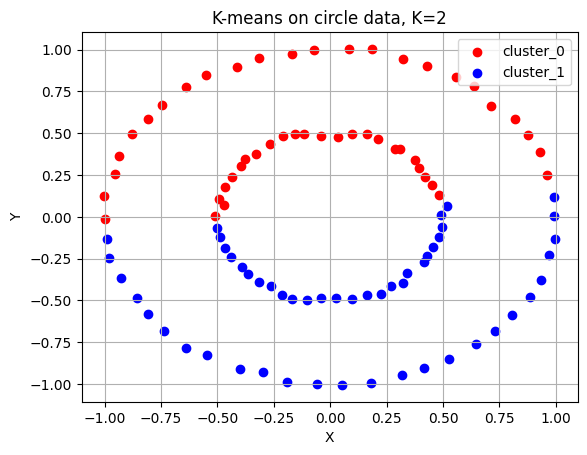

In [41]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

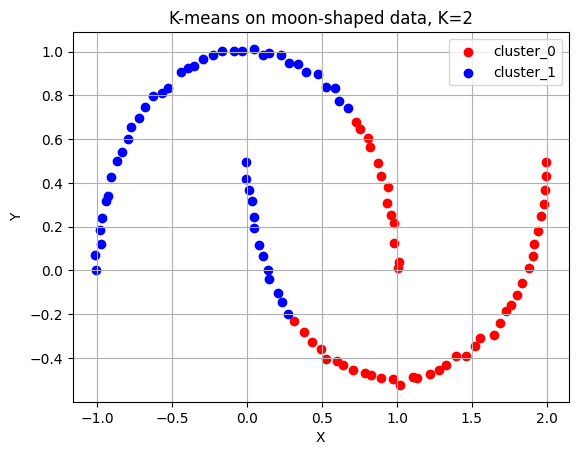

In [42]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

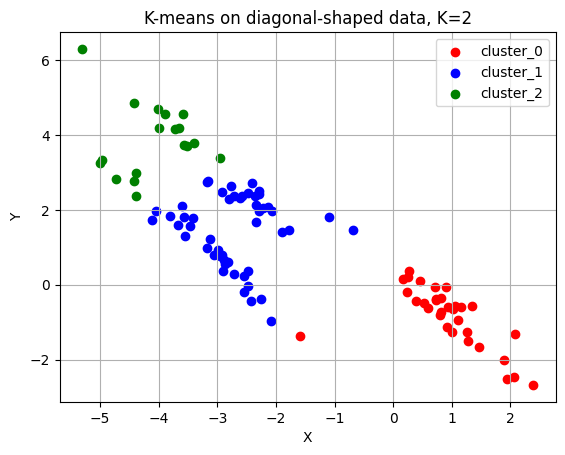

In [43]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

### DBSCAN
* 밀도 기반 군집 알고리즘
* 클러스터가 최초의 임의의 점 하나로부터 점점 퍼져나가는데 그 기준이 바로 일정 반경 안의 데이터 갯수, 즉 데이터의 밀도이기 때문이다.
* DBSCAN 알고리즘의 동작
  - epsilon: 클러스터의 반경
  - minPts: 클러스터를 이루는 개체의 최솟값
  - core point: 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점
  - border point: 군집의 중심이 되지는 못하지만, 군집에 속하는 점
  - noise point: 군집에 포함되지 못하는 점
* K-means에서 K 값을 미리 지정해야 했다면, DBSCAN에서는 epsilon과 minPts 값이 미리 지정해 주어야 하는 변수이다.
* 알고리즘 순서
  1. 임의의 점 p를 설정하고, p를 포함하여 주어진 클러스터의 반경(epsilon)안에 포함되어 있는 점들의 갯수를 샌다.
  2. 만일 해당 원에 minPts개 이상의 점이 포함되면, 해당 점 P를 core point로 간주하고 원에 포함된 점들을 하나의 클러스터로 묶는다.
  3. 해당 원에 minPts개 미만의 점이 포함되어 있으면, 일단 패스한다.
  4. 모든 점에 대하여 돌아가면서 1~3번의 과정을 반복하는데, 만일 새로운 점 p'가 core point가 되고 이 점이 기존의 클러스터(p를 core point로 하는)에 속한다면, 두 개의 클러스터는 연결되어 있다고 하며 하나의 클러스터로 묶는다.
  5. 모든 점에 대하여 클러스터링 과정을 끝냈는데, 어떤 점을 중심으로 하더라도 클러스터에 속하지 못하는 점이 있으면 이를 noise point로 간주한다. 또한, 특정 군집에는 속하지만 core point가 아닌 점들을 border point라고 칭한다.

# of cluster: 2
DBSCAN Y-hat: [0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0]


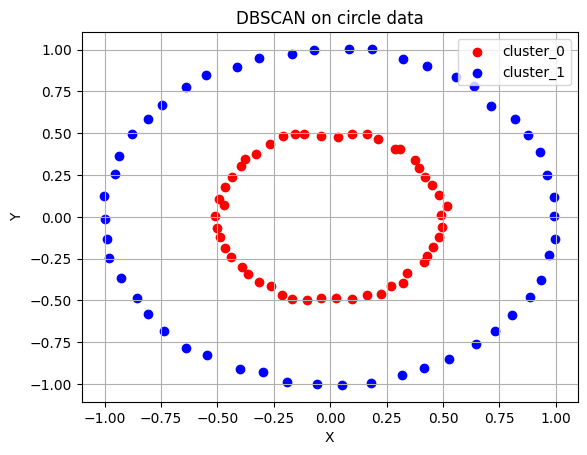

In [44]:
# DBSCAN circle

from sklearn.cluster import DBSCAN

fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'}

epsilon, minPts = 0.2, 3
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
circle_dbscan.fit(circle_points)
n_cluster = max(circle_dbscan.labels_)+1

print(f"# of cluster: {n_cluster}")
print(f"DBSCAN Y-hat: {circle_dbscan.labels_}")

for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0]


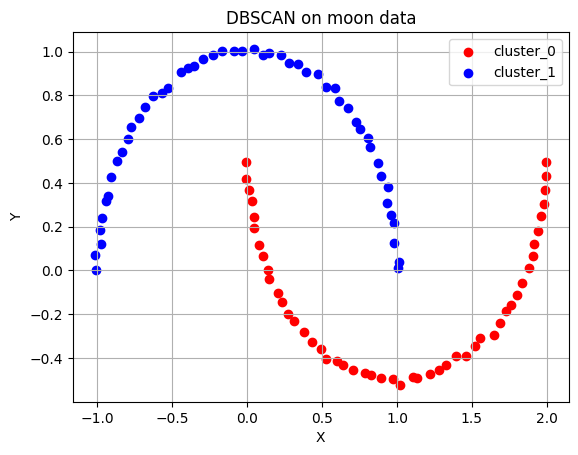

In [45]:
# 달 모양 분포
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


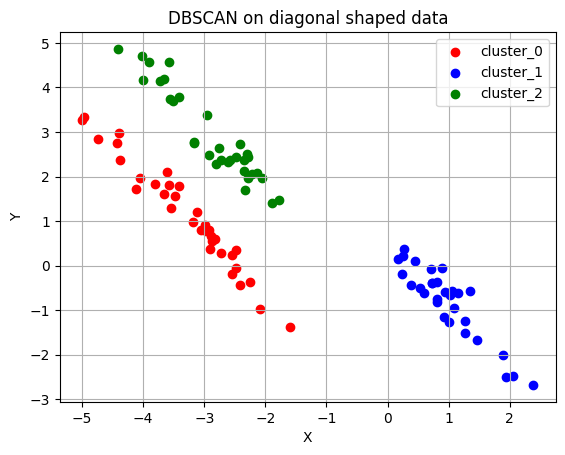

In [46]:
# 대각선 모양 분포 데이터
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### DBSCAN 알고리즘과 K-means 알고리즘의 소요 시간 비교

# of samples: 100 / Elapsed time of K-means: 0.00244s / DBSCAN: 0.00128s
# of samples: 500 / Elapsed time of K-means: 0.00095s / DBSCAN: 0.00160s
# of samples: 1000 / Elapsed time of K-means: 0.00160s / DBSCAN: 0.00314s
# of samples: 2000 / Elapsed time of K-means: 0.00158s / DBSCAN: 0.00729s
# of samples: 5000 / Elapsed time of K-means: 0.07645s / DBSCAN: 0.02351s
# of samples: 7500 / Elapsed time of K-means: 0.01027s / DBSCAN: 0.05907s
# of samples: 10000 / Elapsed time of K-means: 0.01629s / DBSCAN: 0.08939s
# of samples: 20000 / Elapsed time of K-means: 0.02996s / DBSCAN: 0.27505s
# of samples: 30000 / Elapsed time of K-means: 0.07601s / DBSCAN: 0.45124s
# of samples: 40000 / Elapsed time of K-means: 0.03230s / DBSCAN: 0.82763s
# of samples: 50000 / Elapsed time of K-means: 0.03570s / DBSCAN: 1.12610s


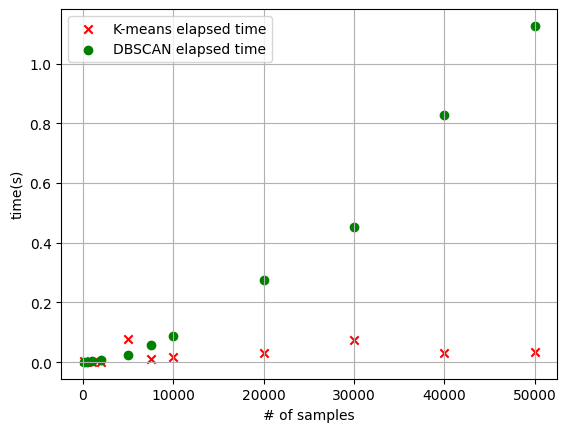

In [47]:
# DBSCAN 알고리즘과 K-means 알고리즘의 시간을 비교하는 코드 
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성

    # K-means 시간을 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    # DBSCAN 시간을 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()

    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))

# K-means와 DBSCAN의 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()

데이터 수에 따라 DBSCAN 알고리즘은 수행 시간이 비선형적으로 증가하게 된다.  
또한 클러스터의 수를 지정해 줄 필요는 없지만 minPts를 지정해줘야 하는 단점이 있다.